# Quends tutorial

Tutorial for SMARTS project meeting 2025.

In [32]:
# Import statements
import quends as qds

## 1. Loading data

In [33]:
# Load GX data
gx_file = "gx/tprim_2_4.out.csv"
data_stream = qds.from_csv(gx_file)

In [34]:
# View data
data_stream.head()

,time,Phi2_t,Phi2_kxt,Phi2_kyt,Phi2_kxkyt,Phi2_zt,Apar2_t,Apar2_kxt,Apar2_kyt,Apar2_kxkyt,...,ParticleFlux_st,ParticleFlux_kxst,ParticleFlux_kyst,ParticleFlux_kxkyst,ParticleFlux_zst,TurbulentHeating_st,TurbulentHeating_kxst,TurbulentHeating_kyst,TurbulentHeating_kxkyst,TurbulentHeating_zst
0,0.012685,0.000103,1.251262e-07,1.663038e-15,1.320573e-17,0.000002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.393226e-11,-1.664718e-13,0.000000e+00,0.0,-4.098138e-13
1,1.281211,0.000084,1.117461e-07,6.184704e-06,8.776450e-18,0.000002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.139165e-12,6.054765e-14,-1.628714e-12,0.0,-5.218765e-13
2,2.549738,0.000071,1.158677e-07,6.426714e-06,3.317595e-17,0.000002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.530310e-12,-4.498932e-14,-7.195619e-13,0.0,4.404623e-13
3,3.818264,0.000062,1.155926e-07,6.020694e-06,5.838486e-18,0.000002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.713494e-12,-7.096199e-14,3.142602e-12,0.0,-4.422235e-13
4,5.086790,0.000060,1.123597e-07,5.107271e-06,1.061533e-17,0.000002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.782954e-12,7.949547e-14,1.517156e-12,0.0,-1.370159e-13


In [35]:
# Inspect variables
data_stream.variables()

Index(['time', 'Phi2_t', 'Phi2_kxt', 'Phi2_kyt', 'Phi2_kxkyt', 'Phi2_zt',
       'Apar2_t', 'Apar2_kxt', 'Apar2_kyt', 'Apar2_kxkyt', 'Apar2_zt',
       'Phi2_zonal_t', 'Phi2_zonal_kxt', 'Phi2_zonal_zt', 'Wg_st', 'Wg_kxst',
       'Wg_kyst', 'Wg_kxkyst', 'Wg_zst', 'Wg_lmst', 'Wphi_st', 'Wphi_kxst',
       'Wphi_kyst', 'Wphi_kxkyst', 'Wphi_zst', 'Wapar_st', 'Wapar_kxst',
       'Wapar_kyst', 'Wapar_kxkyst', 'Wapar_zst', 'HeatFlux_st',
       'HeatFlux_kxst', 'HeatFlux_kyst', 'HeatFlux_kxkyst', 'HeatFlux_zst',
       'HeatFluxES_st', 'HeatFluxES_kxst', 'HeatFluxES_kyst',
       'HeatFluxES_kxkyst', 'HeatFluxES_zst', 'HeatFluxApar_st',
       'HeatFluxApar_kxst', 'HeatFluxApar_kyst', 'HeatFluxApar_kxkyst',
       'HeatFluxApar_zst', 'HeatFluxBpar_st', 'HeatFluxBpar_kxst',
       'HeatFluxBpar_kyst', 'HeatFluxBpar_kxkyst', 'HeatFluxBpar_zst',
       'ParticleFlux_st', 'ParticleFlux_kxst', 'ParticleFlux_kyst',
       'ParticleFlux_kxkyst', 'ParticleFlux_zst', 'TurbulentHeating_st',
       'T

In [36]:
# Number of samples
len(data_stream)

947

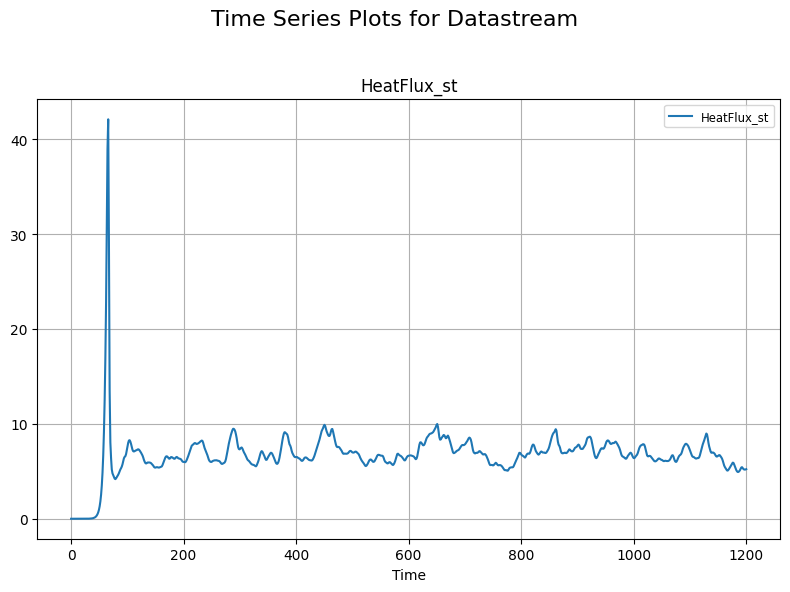

[<Axes: title={'center': 'HeatFlux_st'}, xlabel='Time'>]

In [37]:
# Plot
plotter = qds.Plotter()
variables = ["HeatFlux_st"]
plotter.trace_plot(data_stream, variables)

## 2. Handling transient behavior

In [38]:
# Stationary check using augmented Dickey-Fuller
data_stream.is_stationary(variables)

{'HeatFlux_st': np.True_}

In [39]:
# Trim the data stream
trimmed_data_stream = data_stream.trim(variables[0])

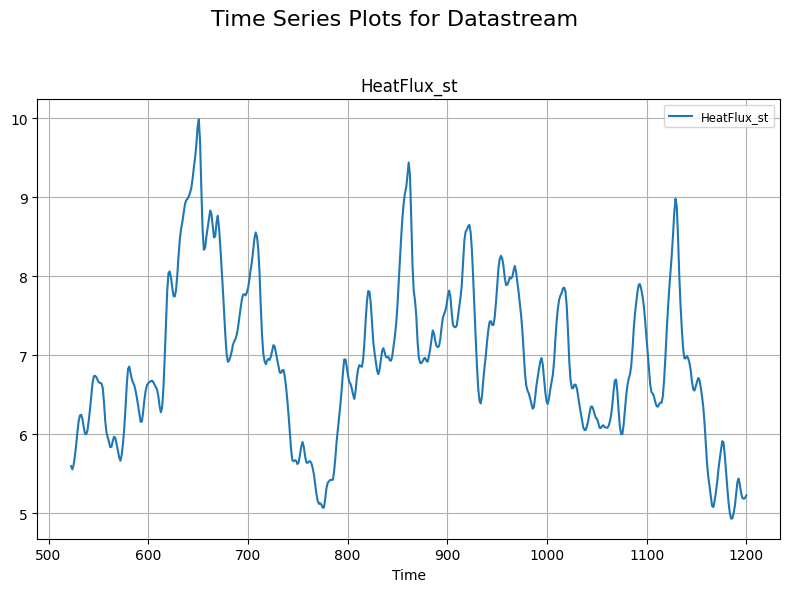

[<Axes: title={'center': 'HeatFlux_st'}, xlabel='Time'>]

In [40]:
# Plot the trimmed data stream
plotter.trace_plot(trimmed_data_stream, variables)

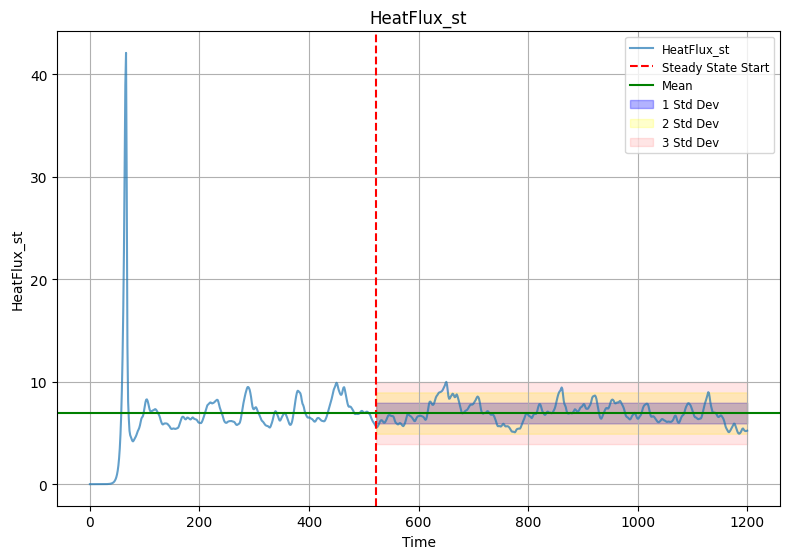

In [41]:
plotter.steady_state_automatic_plot(data_stream, variables[:1], method="std")

## 3. Extracting statistics

In [42]:
# Computing the mean
# trimmed_data_stream.mean()
# trimmed_data_stream.mean(method="sliding")
trimmed_data_stream.mean(window_size=10)

{'HeatFlux_st': {'mean': np.float64(6.963602192927756)}}

In [43]:
# Computing the standard error (= uncertainty in the mean estimate)
trimmed_data_stream.mean_uncertainty()

{'HeatFlux_st': {'mean uncertainty': np.float64(0.10972567273905959)}}

In [44]:
# Confidence interval
trimmed_data_stream.confidence_interval()

{'HeatFlux_st': {'confidence interval': (np.float64(6.843151538047605),
   np.float64(7.273276175184719))}}

In [14]:
# How many extra samples are needed to reduce the uncertainty in the mean by 10%?
trimmed_data_stream.additional_data(reduction_factor=0.1)

{'HeatFlux_st': {'A_est': np.float64(0.25979836115587235),
  'p_est': np.float64(0.16850247307674235),
  'n_current': 470,
  'current_sem': np.float64(0.09212580797390726),
  'target_sem': np.float64(0.08291322717651654),
  'n_target': np.float64(878.3177910194396),
  'additional_samples': 409}}

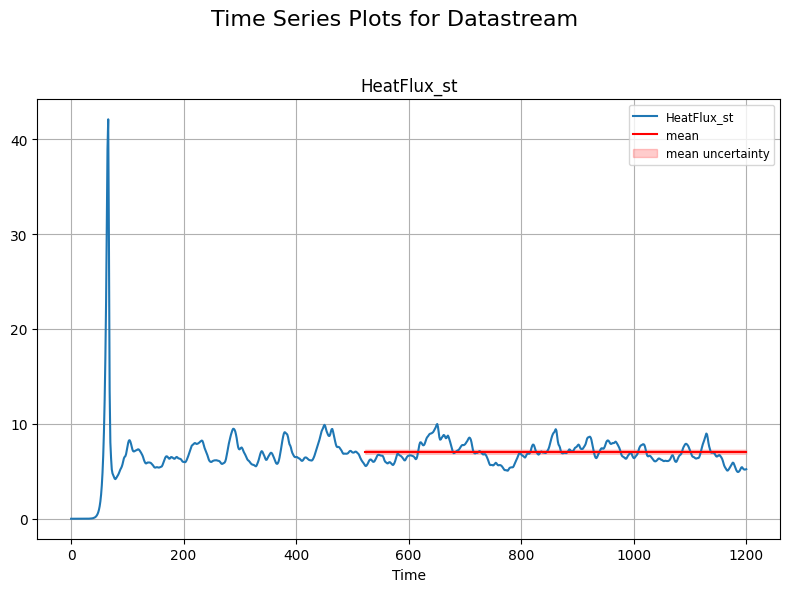

In [15]:
# Plot data stream and mean
plotter.trace_plot_with_mean(data_stream, variables)

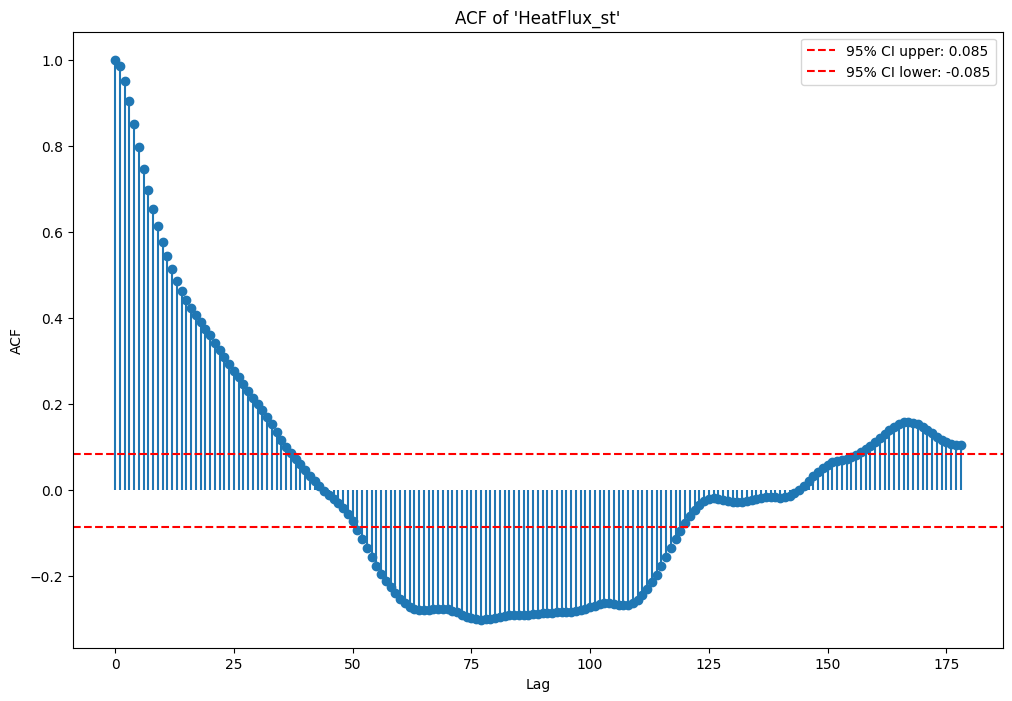

In [16]:
# Plot autocorrelation
plotter.plot_acf(trimmed_data_stream)

In [17]:
# Effective sample size
trimmed_data_stream.effective_sample_size()

{'HeatFlux_st': 8}

## 4. Another example

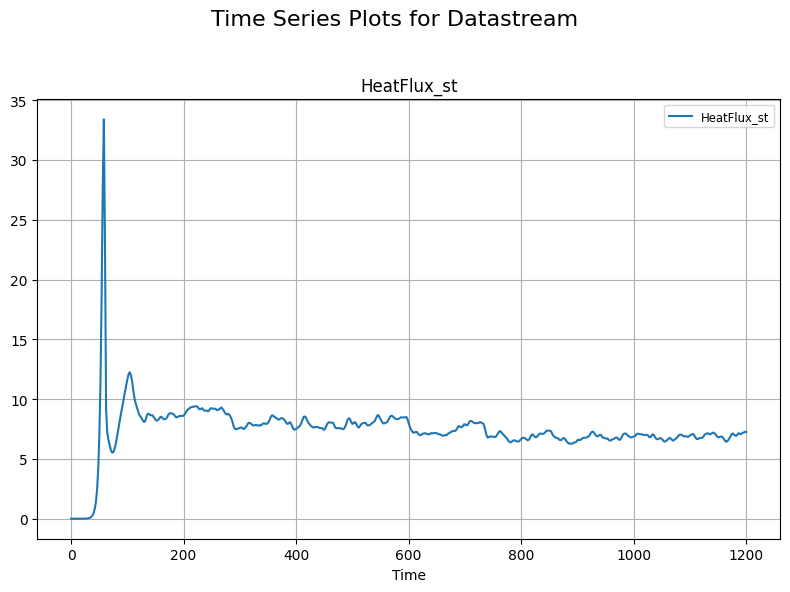

[<Axes: title={'center': 'HeatFlux_st'}, xlabel='Time'>]

In [18]:
# Load GX data
gx_file = "gx/tprim_2_5.out.csv"
data_stream = qds.from_csv(gx_file)
plotter.trace_plot(data_stream, variables)

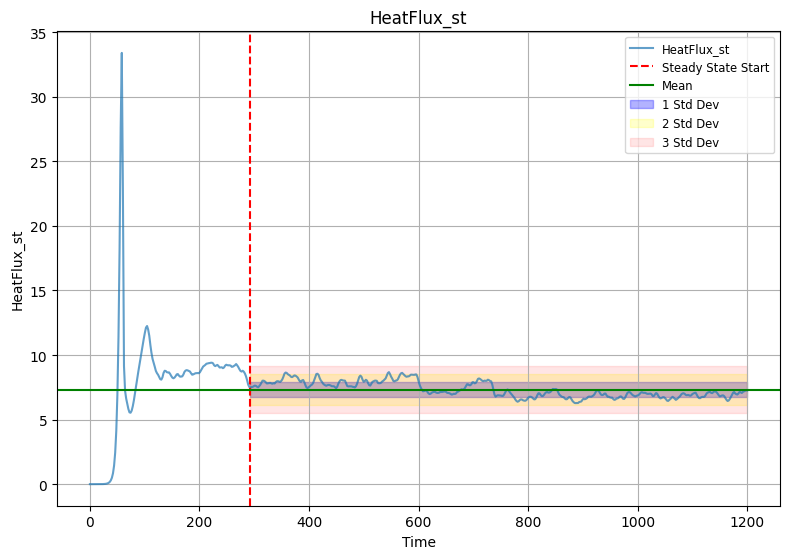

In [19]:
# Determine transient
plotter.steady_state_automatic_plot(data_stream, variables[:1], window_size = 50, method="threshold", threshold = 0.001)

In [20]:
# Trim the data stream
trimmed_data_stream = data_stream.trim(variables[0], method="threshold", threshold = 0.001)

In [21]:
# Compute statistics
trimmed_data_stream.compute_statistics()

{'HeatFlux_st': {'mean': np.float64(7.688177966980286),
  'mean_uncertainty': np.float64(0.09034508309750032),
  'confidence_interval': (np.float64(7.511101604109185),
   np.float64(7.865254329851386)),
  'pm_std': (np.float64(7.597832883882785), np.float64(7.778523050077786))}}

## 5. Handling ensembles

In [22]:
# Load ensemble
gx_files = [f"gx/ensemble/tprim_2_5_{case}.out.csv" for case in ("a", "b", "c", "d")]
data_streams = [qds.from_csv(gx_file) for gx_file in gx_files]
ensemble = qds.Ensemble(data_streams)

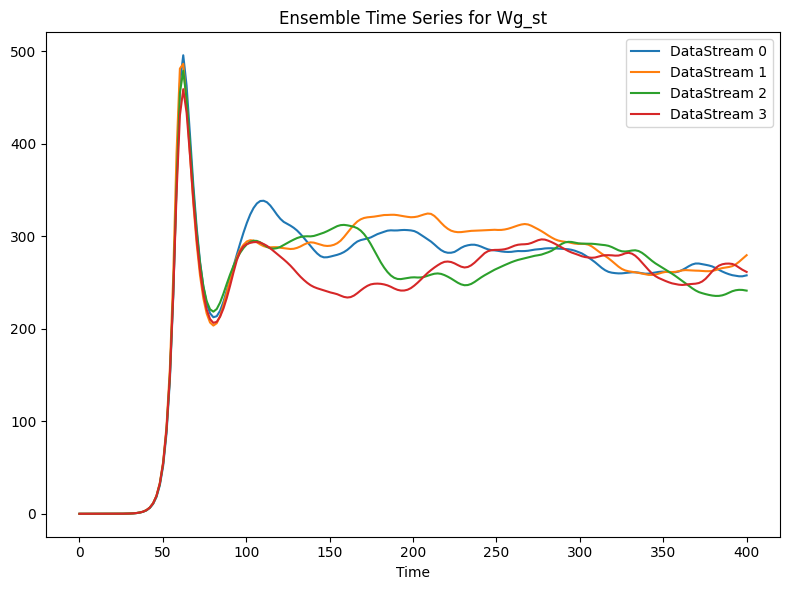

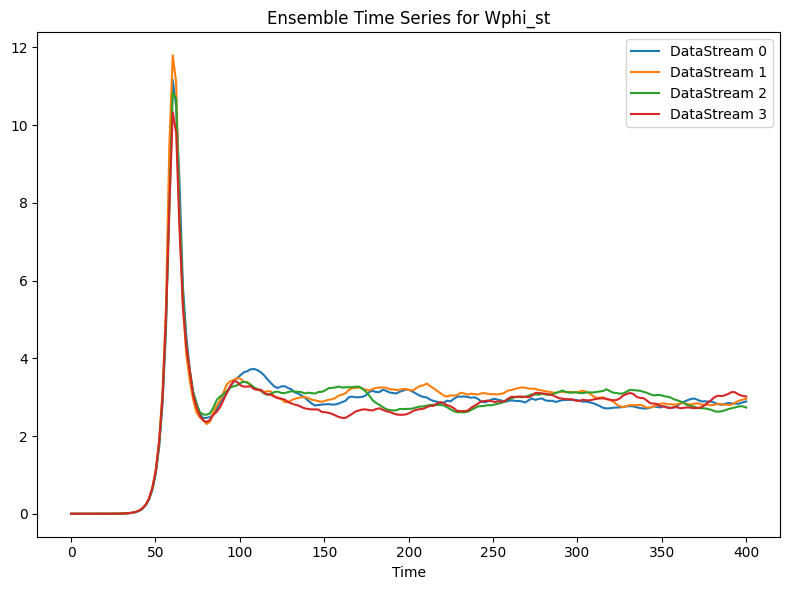

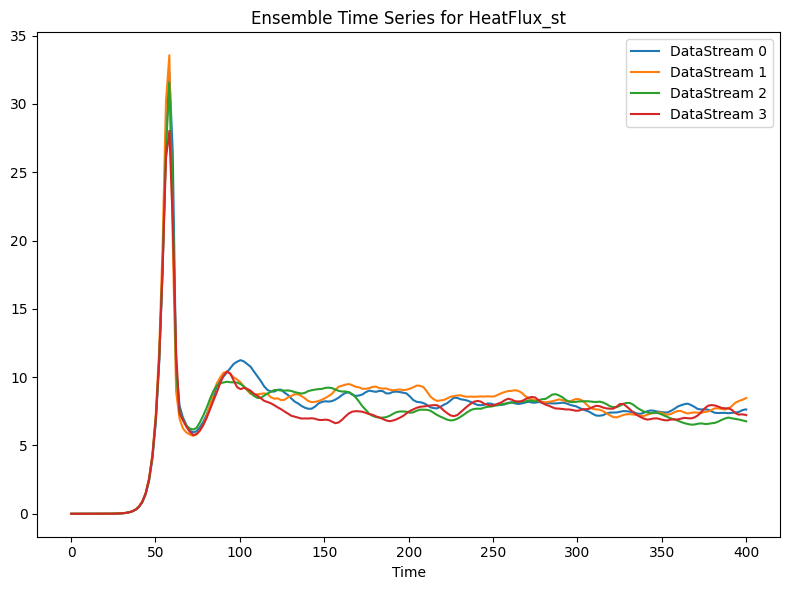

In [23]:
# Plot
variables = ['Wg_st', 'Wphi_st', 'HeatFlux_st']
plotter.ensemble_trace_plot(ensemble, variables)

In [24]:
# Stationary check using augmented Dickey-Fuller
ensemble.is_stationary(variables)

{'Member 0': {'Wg_st': np.True_, 'Wphi_st': np.True_, 'HeatFlux_st': np.True_},
 'Member 1': {'Wg_st': np.True_, 'Wphi_st': np.True_, 'HeatFlux_st': np.True_},
 'Member 2': {'Wg_st': np.True_, 'Wphi_st': np.True_, 'HeatFlux_st': np.True_},
 'Member 3': {'Wg_st': np.True_, 'Wphi_st': np.True_, 'HeatFlux_st': np.True_}}

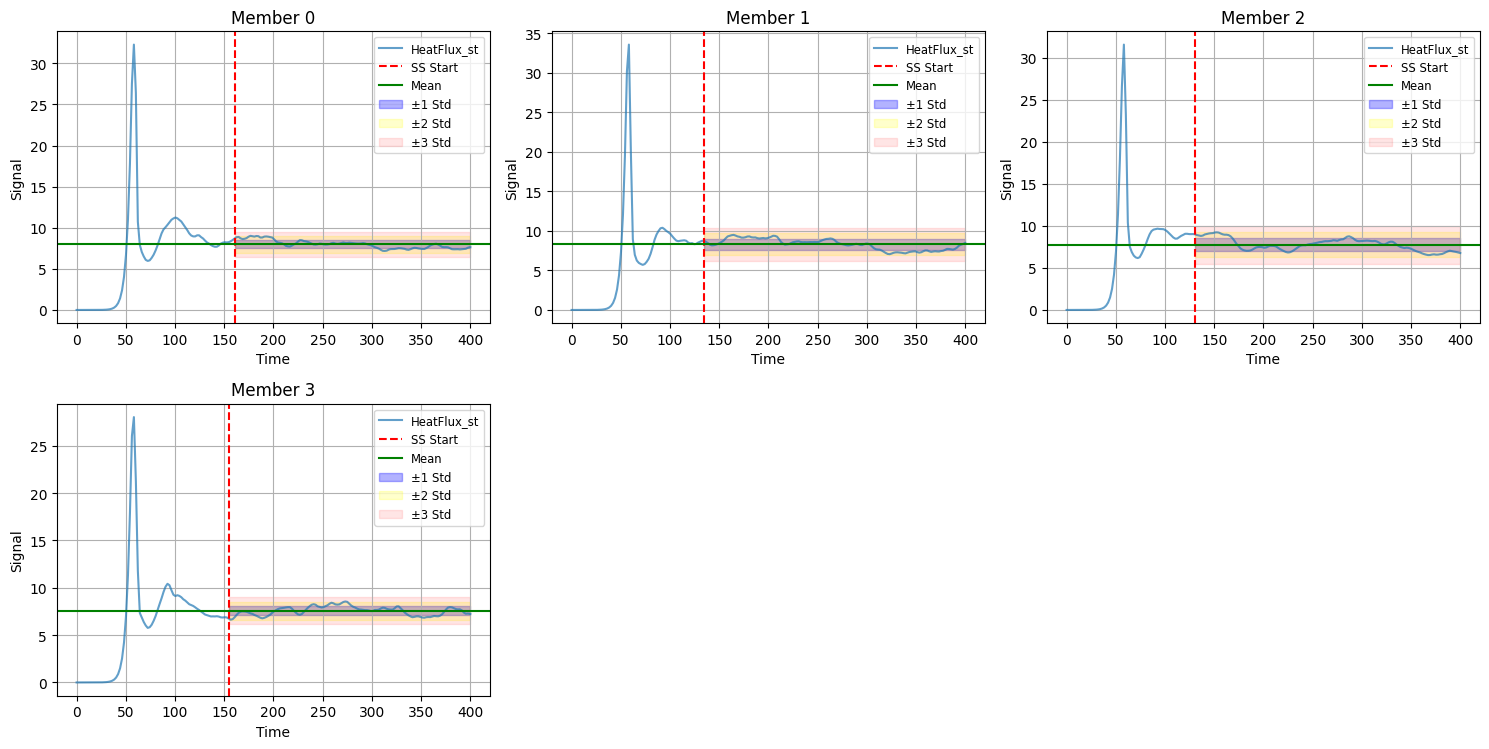

In [25]:
# Determine transient
plotter.ensemble_steady_state_automatic_plot(
    ensemble_obj=ensemble,
    variables_to_plot=variables[-1:],
    window_size=30,
    start_time=0.0,
    method="rolling_variance",
    save=False
)

In [26]:
# Trim ensemble
trimmed_ensemble = ensemble.trim(variables[-1])

In [27]:
# Mean
trimmed_ensemble.mean()

{'Member 0': {'HeatFlux_st': {'mean': np.float64(7.959850951225491)}},
 'Member 1': {'HeatFlux_st': {'mean': np.float64(8.396685189666666)}},
 'Member 2': {'HeatFlux_st': {'mean': np.float64(7.943318924899598)}},
 'Member 3': {'HeatFlux_st': {'mean': np.float64(7.517684824341085)}}}

In [28]:
# Confidence interval
trimmed_ensemble.confidence_interval()

{'Member 0': {'HeatFlux_st': (np.float64(7.7703645071606156),
   np.float64(8.149337395290367))},
 'Member 1': {'HeatFlux_st': (np.float64(8.168494170655848),
   np.float64(8.624876208677485))},
 'Member 2': {'HeatFlux_st': (np.float64(7.813182297581164),
   np.float64(8.073455552218032))},
 'Member 3': {'HeatFlux_st': (np.float64(7.3972638344231685),
   np.float64(7.638105814259002))}}